<a href="https://colab.research.google.com/github/marclamberts/football-analysis/blob/main/g%2B_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load the match event CSV
file_path = '/content/drive/MyDrive/Recruitment/Brøndby 1-1 Nordsjælland.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
# Filter for successful passes
successful_passes = df[(df['typeId'] == 1) & (df['outcome'] == 1)]

# Assign g+ value
successful_passes['g_plus'] = 0.01

# Group by player (assuming 'id' is the player/event identifier)
player_gplus = successful_passes.groupby('playerName')['g_plus'].sum().reset_index()
player_gplus.columns = ['Player', 'g+ from successful passes']

# Sort by g+
player_gplus = player_gplus.sort_values(by='g+ from successful passes', ascending=False)
player_gplus.reset_index(drop=True, inplace=True)

# Display top results
player_gplus.head(10)


<ipython-input-2-b1d3351de027>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_passes['g_plus'] = 0.01


,Player,g+ from successful passes
0,L. Hey,1.02
1,L. Høgsberg,0.90
2,J. Tverskov,0.87
3,D. Svensson,0.80
4,M. Dorgeles,0.79
5,P. Ankersen,0.74
6,M. Brink,0.64
7,B. Nygren,0.44
8,F. Alves,0.43
9,J. Vanlerberghe,0.43


In [3]:
# Convert g+ to WAR
player_gplus['WAR (from passes only)'] = player_gplus['g+ from successful passes'] / 2.7

# View top players by WAR
player_gplus.head(10)


,Player,g+ from successful passes,WAR (from passes only)
0,L. Hey,1.02,0.377778
1,L. Høgsberg,0.90,0.333333
2,J. Tverskov,0.87,0.322222
3,D. Svensson,0.80,0.296296
4,M. Dorgeles,0.79,0.292593
5,P. Ankersen,0.74,0.274074
6,M. Brink,0.64,0.237037
7,B. Nygren,0.44,0.162963
8,F. Alves,0.43,0.159259
9,J. Vanlerberghe,0.43,0.159259


            Player  g+ from successful passes
0           L. Hey                       1.02
1      L. Høgsberg                       0.90
2      J. Tverskov                       0.87
3      D. Svensson                       0.80
4      M. Dorgeles                       0.79
5      P. Ankersen                       0.74
6         M. Brink                       0.64
7        B. Nygren                       0.44
8         F. Alves                       0.43
9  J. Vanlerberghe                       0.43


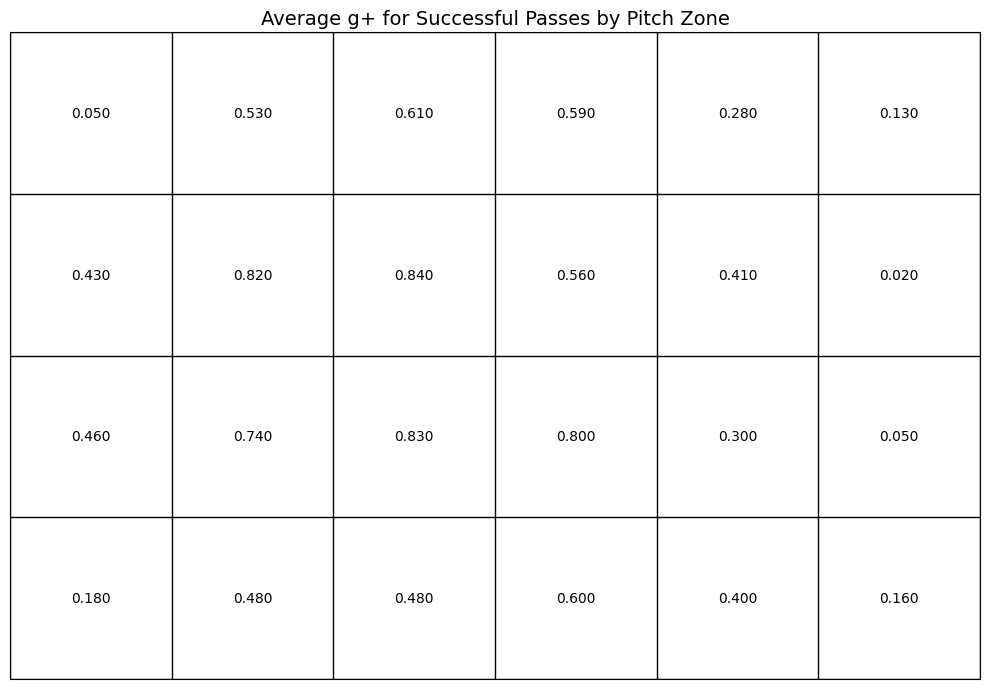

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# ------------------------------
# PART 1: g+ per Player
# ------------------------------

# Filter for successful passes
successful_passes = df[(df['typeId'] == 1) & (df['outcome'] == 1)].copy()

# Assign g+ value
successful_passes['g_plus'] = 0.01

# Group by player (assuming 'playerName' exists)
player_gplus = successful_passes.groupby('playerName')['g_plus'].sum().reset_index()
player_gplus.columns = ['Player', 'g+ from successful passes']

# Sort and display
player_gplus = player_gplus.sort_values(by='g+ from successful passes', ascending=False).reset_index(drop=True)
print(player_gplus.head(10))

# ------------------------------
# PART 2: g+ per Pitch Zone (Heatmap)
# ------------------------------

# Ensure x/y are numeric
successful_passes['x'] = pd.to_numeric(successful_passes['x'], errors='coerce')
successful_passes['y'] = pd.to_numeric(successful_passes['y'], errors='coerce')
successful_passes = successful_passes.dropna(subset=['x', 'y'])

# Bin settings
x_bins = 6
y_bins = 4
successful_passes['x_bin'] = pd.cut(successful_passes['x'], bins=x_bins, labels=False)
successful_passes['y_bin'] = pd.cut(successful_passes['y'], bins=y_bins, labels=False)

# Aggregate average g+ by bin
zone_gplus = successful_passes.groupby(['x_bin', 'y_bin'])['g_plus'].sum().unstack()
#zone_war = successful_passes.groupby(['x_bin', 'y_bin'])['g_plus'].sum().unstack() / 2.7

# ------------------------------
# Plotting
# ------------------------------

fig, ax = plt.subplots(figsize=(10, 7))

# Draw pitch lines
for x in range(x_bins + 1):
    ax.axvline(x, color='black', lw=1)
for y in range(y_bins + 1):
    ax.axhline(y, color='black', lw=1)

# Add g+ values in each bin
for i in range(x_bins):
    for j in range(y_bins):
        value = zone_gplus.loc[i, j] if (i in zone_gplus.index and j in zone_gplus.columns) else 0
        ax.text(i + 0.5, j + 0.5, f"{value:.3f}", va='center', ha='center', fontsize=10)

# Style
ax.set_xlim(0, x_bins)
ax.set_ylim(0, y_bins)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Average g+ for Successful Passes by Pitch Zone", fontsize=14)
ax.set_aspect('equal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


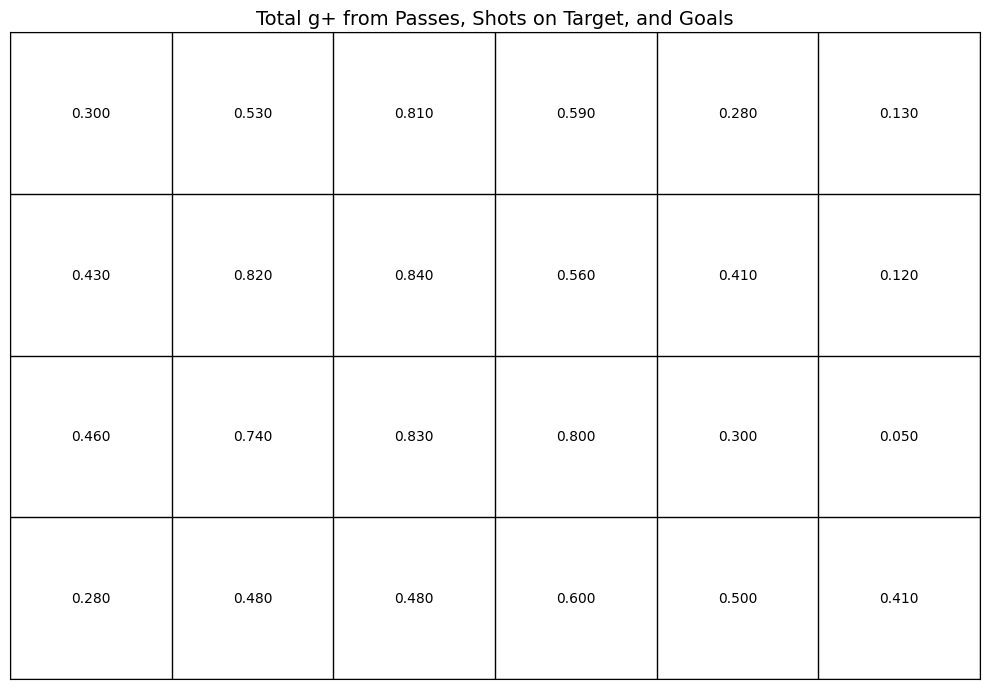

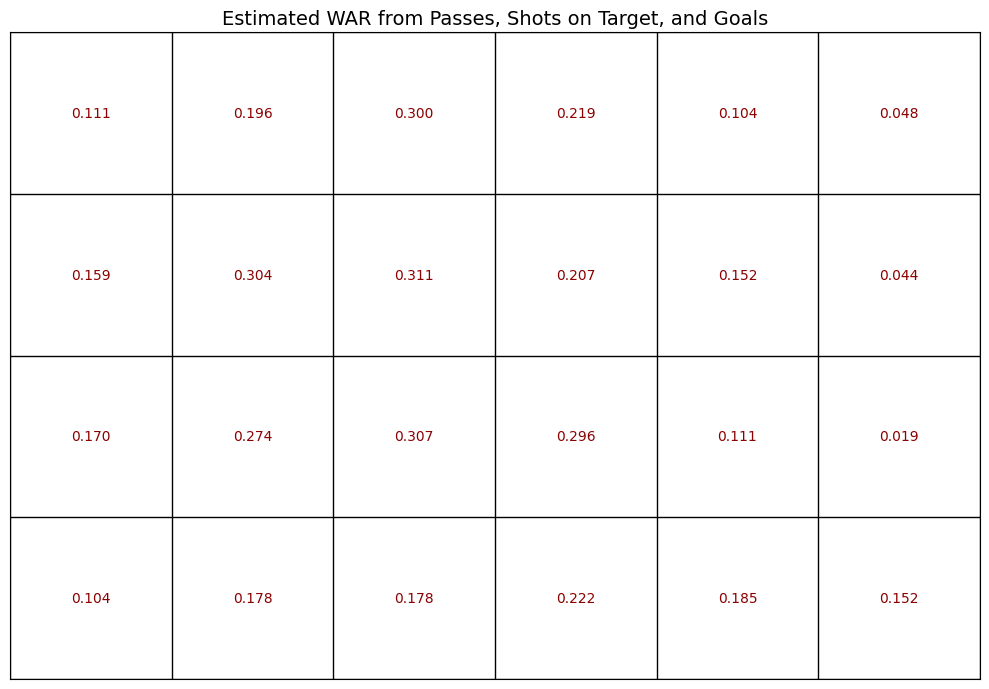

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# ------------------------------
# STEP 1: Assign g+ values
# ------------------------------

# Successful passes
passes = df[(df['typeId'] == 1) & (df['outcome'] == 1)].copy()
passes['g_plus'] = 0.01

# Shots on target
shots = df[df['typeId'] == 15].copy()
shots['g_plus'] = 0.10

# Goals
goals = df[df['typeId'] == 16].copy()
goals['g_plus'] = 0.25

# ------------------------------
# STEP 2: Prepare x/y coordinates and binning
# ------------------------------

x_bins = 6
y_bins = 4

for action_df in [passes, shots, goals]:
    action_df['x'] = pd.to_numeric(action_df['x'], errors='coerce')
    action_df['y'] = pd.to_numeric(action_df['y'], errors='coerce')
    action_df.dropna(subset=['x', 'y'], inplace=True)
    action_df['x_bin'] = pd.cut(action_df['x'], bins=x_bins, labels=False)
    action_df['y_bin'] = pd.cut(action_df['y'], bins=y_bins, labels=False)

# ------------------------------
# STEP 3: Combine and compute totals
# ------------------------------

combined = pd.concat([passes, shots, goals], ignore_index=True)
zone_gplus = combined.groupby(['x_bin', 'y_bin'])['g_plus'].sum().unstack()
zone_war = zone_gplus / 2.7

# ------------------------------
# STEP 4: Plot g+ heatmap
# ------------------------------

fig, ax = plt.subplots(figsize=(10, 7))
for x in range(x_bins + 1):
    ax.axvline(x, color='black', lw=1)
for y in range(y_bins + 1):
    ax.axhline(y, color='black', lw=1)

for i in range(x_bins):
    for j in range(y_bins):
        value = zone_gplus.loc[i, j] if (i in zone_gplus.index and j in zone_gplus.columns) else 0
        ax.text(i + 0.5, j + 0.5, f"{value:.3f}", va='center', ha='center', fontsize=10)

ax.set_xlim(0, x_bins)
ax.set_ylim(0, y_bins)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Total g+ from Passes, Shots on Target, and Goals", fontsize=14)
ax.set_aspect('equal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ------------------------------
# STEP 5: Plot WAR heatmap
# ------------------------------

fig, ax = plt.subplots(figsize=(10, 7))
for x in range(x_bins + 1):
    ax.axvline(x, color='black', lw=1)
for y in range(y_bins + 1):
    ax.axhline(y, color='black', lw=1)

for i in range(x_bins):
    for j in range(y_bins):
        value = zone_war.loc[i, j] if (i in zone_war.index and j in zone_war.columns) else 0
        ax.text(i + 0.5, j + 0.5, f"{value:.3f}", va='center', ha='center', fontsize=10, color='darkred')

ax.set_xlim(0, x_bins)
ax.set_ylim(0, y_bins)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Estimated WAR from Passes, Shots on Target, and Goals", fontsize=14)
ax.set_aspect('equal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [9]:
from google.colab import drive
import pandas as pd

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define output path in your Drive (adjust the folder if needed)
output_path = "/content/drive/MyDrive/Recruitment/gplus_war_pitch_zones.xlsx"

# 3. Flatten and prepare data
zone_gplus_flat = zone_gplus.stack().reset_index()
zone_gplus_flat.columns = ['x_bin', 'y_bin', 'g_plus']

zone_war_flat = zone_war.stack().reset_index()
zone_war_flat.columns = ['x_bin', 'y_bin', 'WAR']

zone_export = pd.merge(zone_gplus_flat, zone_war_flat, on=['x_bin', 'y_bin'])

# 4. Save to Excel in Drive
zone_export.to_excel(output_path, index=False)

print(f"✅ File saved to: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File saved to: /content/drive/MyDrive/Recruitment/gplus_war_pitch_zones.xlsx
